# Conventional volatility measure – standard deviation

In [ ]:
!pip install yfinance

In [ ]:
!pip install arch

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf
from scipy import stats
import statsmodels.formula.api as sm
import statsmodels.stats.stattools as tools
from scipy.stats import probplot
from arch import arch_model

In [4]:
today = datetime.today()
days = timedelta(days=1000)
start = today-days

In [5]:
print('start:', start, '\t', 'end:', today)

start: 2019-10-29 01:36:13.938826 	 end: 2022-07-25 01:36:13.938826


In [ ]:
stk = 'EBAY'
stk = yf.download(stk, start, today)
df = stk['Adj Close']

In [7]:
ret = df.pct_change(1)
ret.dropna(inplace=True)
ret

Date
2019-10-30   -0.006924
2019-10-31   -0.017011
2019-11-01    0.000000
2019-11-04    0.004539
2019-11-05    0.001977
                ...   
2022-07-18   -0.000459
2022-07-19    0.041064
2022-07-20    0.017849
2022-07-21    0.009959
2022-07-22    0.000643
Name: Adj Close, Length: 687, dtype: float64

In [8]:
std_annual=np.std(ret)*np.sqrt(252)

In [9]:
print('volatility (std)=',round(std_annual,4))

volatility (std)= 0.355


# Test of Normality

* The first value  of the result is the test statistic, and the second one is its corresponding P-value.

In [10]:
print(stats.shapiro(ret))

# reject the null hypothesis and
# conclude that the daily returns do 
# not follow a normal distribution

ShapiroResult(statistic=0.9770476222038269, pvalue=6.625810566873724e-09)


# Estimating fat tails

* mean or average: $M = \frac{Σ^n_{i=1}(R_i)}{n}$

* variance: $ \sigma^2 = \frac{Σ^n_{i=1}(R_i-\overline{R})}{(n-1)}$ 

* skewness: $ skew = \frac{Σ^n_i(R_i-\overline{R})^3}{(n-1)σ^3}$

* kurtosis: $kurt = \frac{Σ^n_i(R_i-\overline{R})^4}{(n-1)σ^4}$

In [11]:
print('mean =',np.mean(ret))
print('std =',np.std(ret))
print('skewness=',stats.skew(ret))
print('kurtosis=',stats.kurtosis(ret))

# the skewness is fairly symmetrical
# the kurtosis score shows outliers are present

mean = 0.0006803267540934932
std = 0.02236246367091753
skewness= -0.3105537053954712
kurtosis= 2.2359072074954174


# ARCH model

* $ \sigma^2_t = a_0 + \sum^q_{i=1}a_i\epsilon^2_{t-1}$

* variance at time $t$: $ \sigma^2_t$

* order of error terms: $q$

* $ ith$ coefficient: $a_0$

* squared error term for the period of $t-i$: $\epsilon^2_{t-1}$

In [12]:
model = arch_model(ret, mean='Zero', vol='ARCH', p=1, o=0, q=0)

In [13]:
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:                1638.39
Distribution:                  Normal   AIC:                          -3272.78
Method:            Maximum Likelihood   BIC:                          -3263.72
                                        No. Observations:                  687
Date:                Mon, Jul 25 2022   Df Residuals:                      687
Time:                        01:36:14   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.5390e-04  4.705e-05      9.647  5.073e-22 [3.

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005001. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


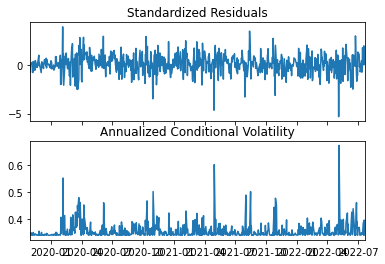

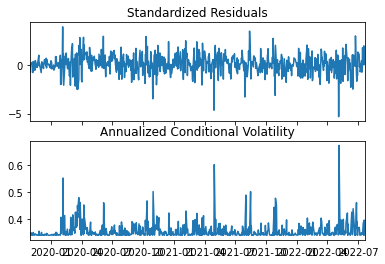

In [14]:
model_fitted.plot(annualize='D')

# GARCH model

* $ \sigma^2_t = a_0 + \sum^q_{i=1}a_i\epsilon^2_{t-1} + \sum^p_{i=1} \beta_i \sigma^2_{t-i}$

* variance at time t: $ \sigma^2_t$

* order of error terms: $q$

* order for the variance: $p$

* $ ith$ coefficient: $a_0$

* squared error term for the period of $t-i$: $\epsilon^2_{t-1}$

* coefficient for the variance at time $t-i$: $ \beta_i$

In [15]:
model = arch_model(ret, mean='Zero', vol='GARCH', p=1, o=0, q=1)

In [16]:
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                1656.16
Distribution:                  Normal   AIC:                          -3306.32
Method:            Maximum Likelihood   BIC:                          -3292.72
                                        No. Observations:                  687
Date:                Mon, Jul 25 2022   Df Residuals:                      687
Time:                        01:36:15   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.1464e-05  5.101e-06      8.129  4.335e-16 [3.

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005001. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


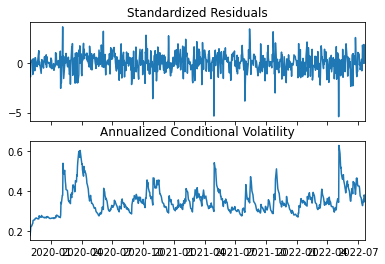

<Figure size 2000x1200 with 0 Axes>

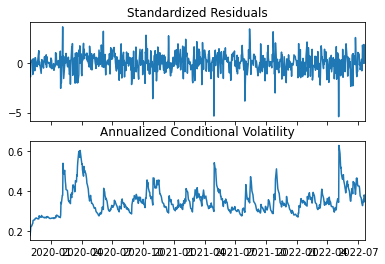

In [32]:
model_fitted.plot(annualize='D')

# CCC-GARCH model for multivariate volatility forecasting

In [18]:
RISKY_ASSETS = ['GOOG', 'MSFT', 'AAPL']
N = len(RISKY_ASSETS)

In [19]:
today = datetime.today()
days = timedelta(days=1000)
start = today-days

In [ ]:
df = yf.download(RISKY_ASSETS,
                 start=start,
                 end=today,
                 adjusted=True)

In [21]:
df = df['Adj Close']

In [22]:
returns = df.pct_change(1)
returns.dropna(inplace=True)
returns

,AAPL,GOOG,MSFT
Date,,,
2019-10-30,-0.000123,-0.001053,0.012462
2019-10-31,0.022610,-0.000936,-0.008575
2019-11-01,0.028381,0.010817,0.002441
2019-11-04,0.006567,0.013841,0.005775
2019-11-05,-0.001437,0.000511,-0.000623
...,...,...,...
2022-07-18,-0.020643,-0.025335,-0.009621
2022-07-19,0.026722,0.042853,0.020767
2022-07-20,0.013510,0.000698,0.010558


In [23]:
# Define lists for storing objects

coeffs = []
cond_vol = []
std_resids = []
models = []

In [ ]:
# Estimate the univariate GARCH models

for asset in returns.columns:
    model = arch_model(returns[asset], mean='Constant', 
                       vol='GARCH', p=1, o=0, 
                       q=1).fit(update_freq=0, disp='off')
    coeffs.append(model.params)
    cond_vol.append(model.conditional_volatility)
    std_resids.append(model.resid / model.conditional_volatility)
    models.append(model)

In [25]:
# Store the results in DataFrames

coeffs_df = pd.DataFrame(coeffs, index=returns.columns)
cond_vol_df = pd.DataFrame(cond_vol).transpose() \
                                    .set_axis(returns.columns, 
                                              axis='columns', 
                                              inplace=False)
std_resids_df = pd.DataFrame(std_resids).transpose() \
                                        .set_axis(returns.columns, 
                                                  axis='columns', 
                                                  inplace=False)

In [26]:
# Calculate the constant conditional correlation matrix (R)

R = std_resids_df.transpose() \
                 .dot(std_resids_df) \
                 .div(len(std_resids_df))

In [ ]:
# Calculate the one-step-ahead forecast of the conditional covariance matrix

diag = []
D = np.zeros((N, N))

for model in models:
    diag.append(model.forecast(horizon=1).variance.values[-1][0])
diag = np.sqrt(np.array(diag))
np.fill_diagonal(D, diag)

H = np.matmul(np.matmul(D, R.values), D)

In [28]:
FC = pd.DataFrame(H)
FC.columns = ['GOOG', 'MSFT', 'AAPL']

In [29]:
FC

,GOOG,MSFT,AAPL
0,0.000297,0.000314,0.000205
1,0.000314,0.000839,0.000364
2,0.000205,0.000364,0.000287
